#Read the data as an appropriate Time Series data and plot the data.

In [1]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#READING THE ROSE CSV AS A TIME SERIES DATA
df_r = pd.read_csv('/content/Sparkling.csv', parse_dates = ['YearMonth'])

df_r.head(5)

,YearMonth,Sparkling
0,1980-01-01,1686
1,1980-02-01,1591
2,1980-03-01,2304
3,1980-04-01,1712
4,1980-05-01,1471


In [186]:
df_r.tail(5)

,YearMonth,Sparkling
182,1995-03-01,1897
183,1995-04-01,1862
184,1995-05-01,1670
185,1995-06-01,1688
186,1995-07-01,2031


In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

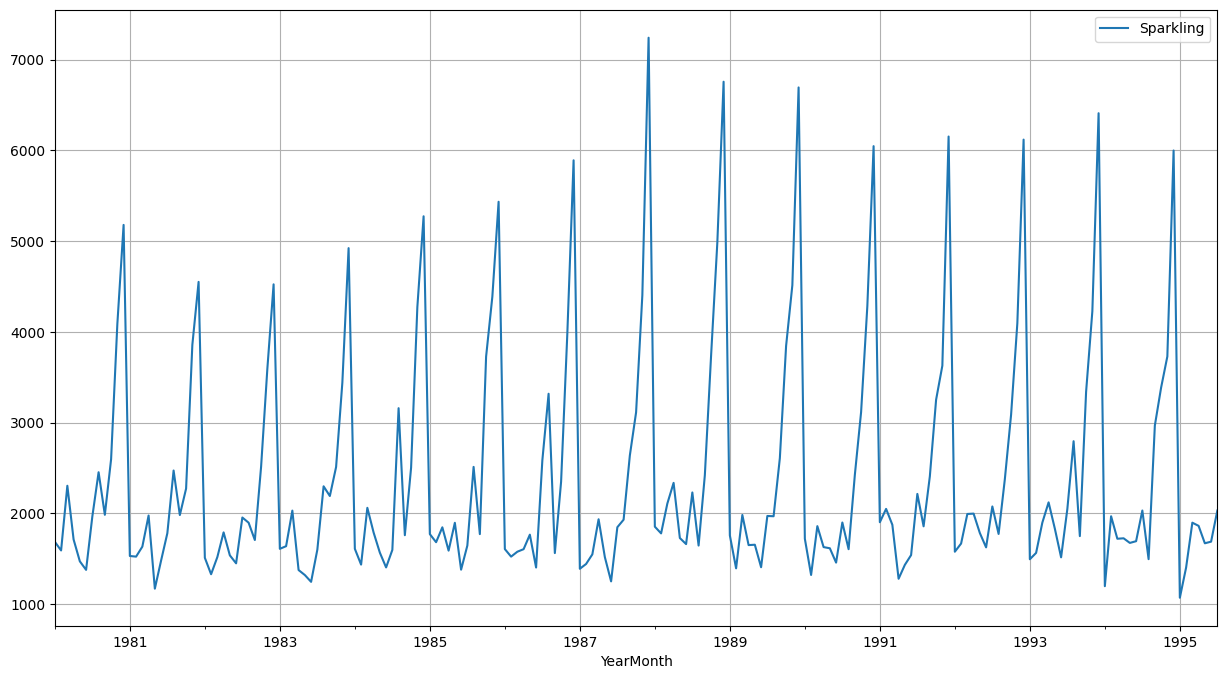

In [7]:
#plotting the Rose time series data
df_r.plot(x = ('YearMonth'), y = ('Sparkling'), grid=True);

#Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [8]:
#Check data types
df_r.dtypes

YearMonth    datetime64[ns]
Sparkling             int64
dtype: object

In [9]:
round(df_r.describe(),3)

,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000


In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
#additive decomposition for Rose data
df_r_add_decompose = seasonal_decompose(df_r['Sparkling'], model = 'additive', period = 12)

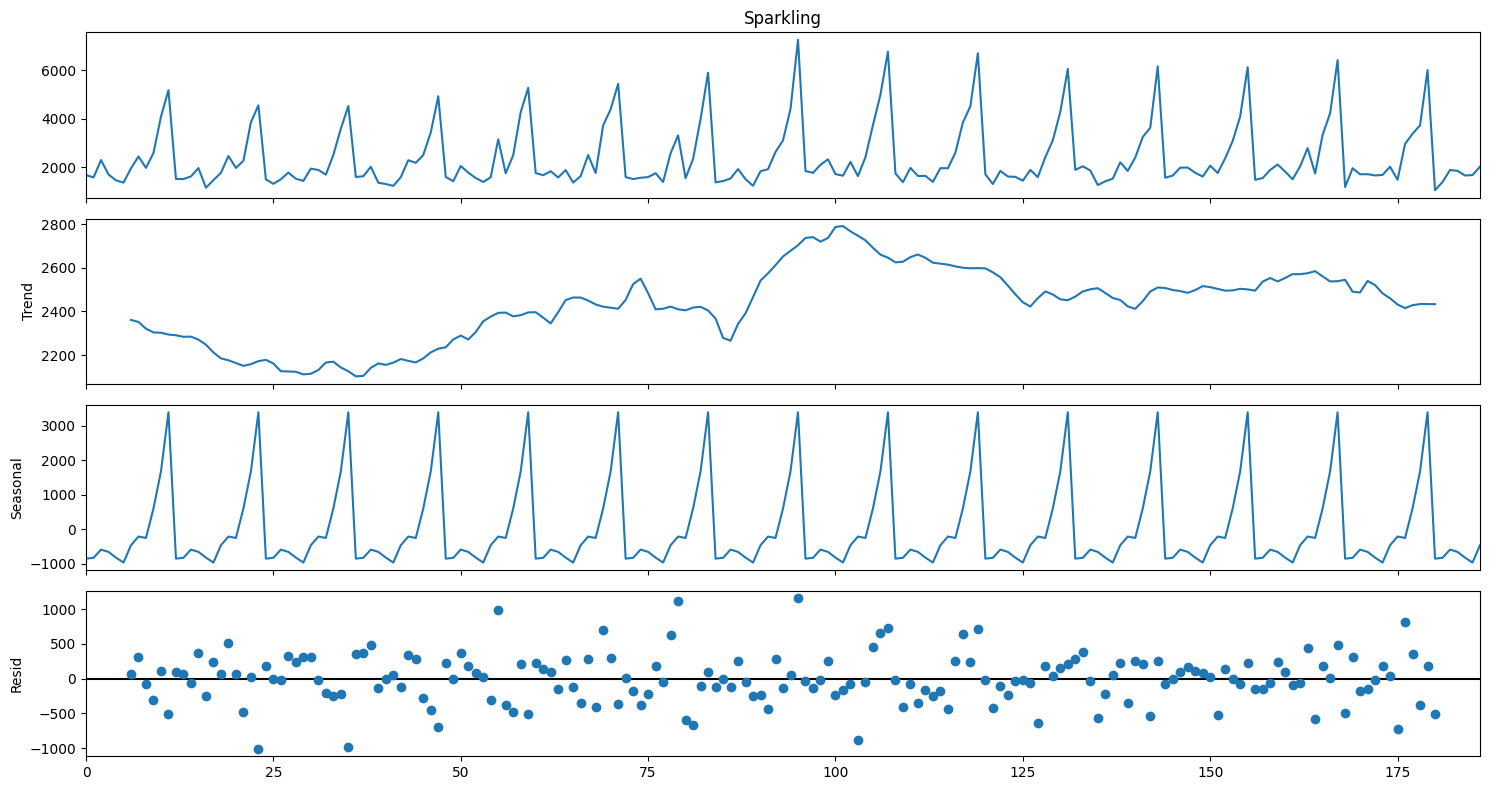

In [12]:
df_r_add_decompose.plot()
plt.show()

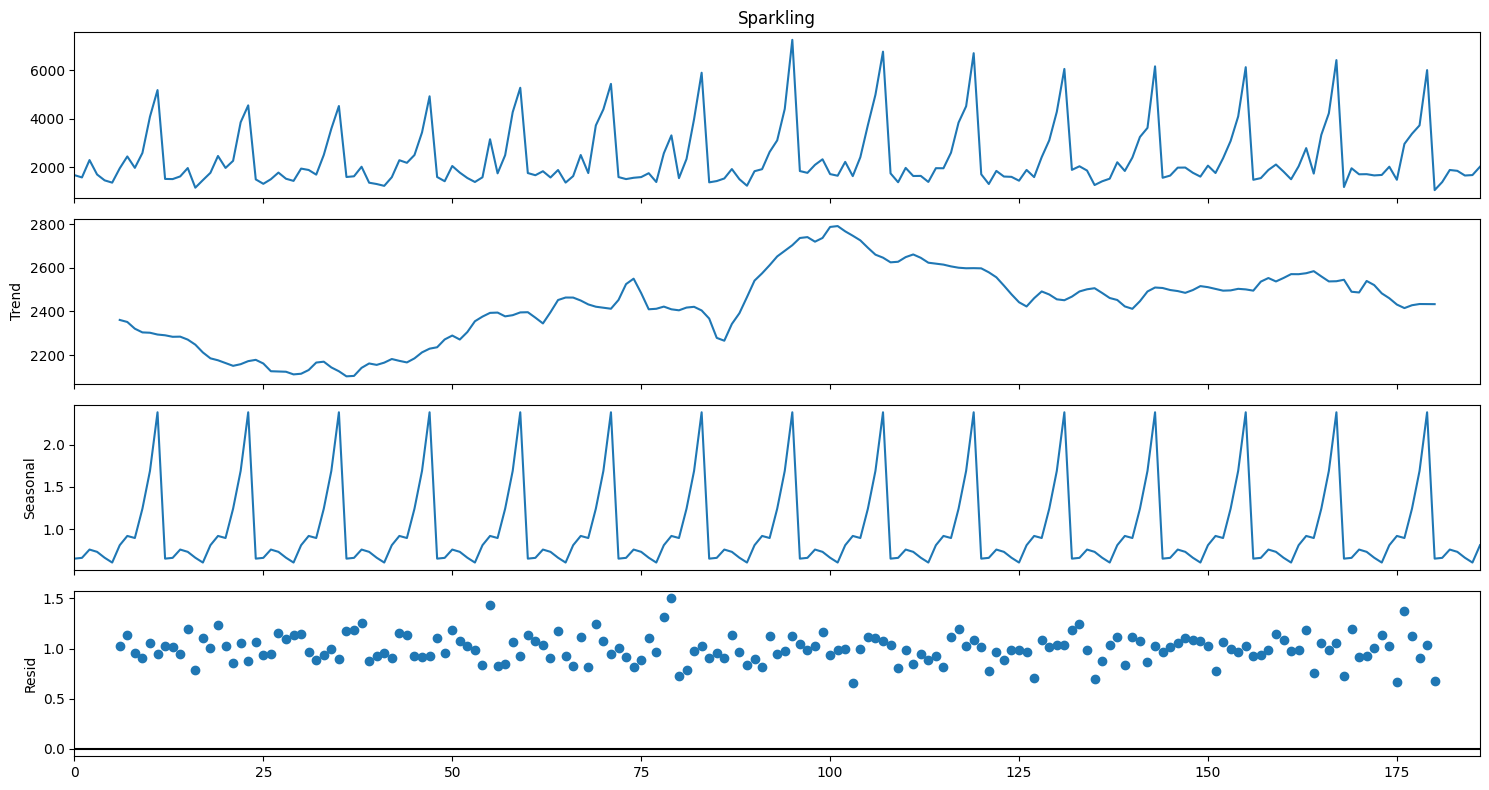

In [14]:
#seasonal decompose for rose data
df_r_mul_decompose = seasonal_decompose(df_r['Sparkling'], model = "multiplicative", period = 12)
df_r_mul_decompose.plot()
plt.show()

# Split the data into training and test. The test data should start in 1991.

In [4]:
r_train = df_r[df_r['YearMonth']<'1991']
r_test = df_r[df_r['YearMonth']>'1991']

In [16]:
# Printing the Rose Data
print('Training Data')
display(r_train.head())
print('Test Data')
display(r_test.head())

Training Data


,YearMonth,Sparkling
0,1980-01-01,1686
1,1980-02-01,1591
2,1980-03-01,2304
3,1980-04-01,1712
4,1980-05-01,1471


Test Data


,YearMonth,Sparkling
133,1991-02-01,2049
134,1991-03-01,1874
135,1991-04-01,1279
136,1991-05-01,1432
137,1991-06-01,1540


#Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

In [17]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

Simple Exponential Smoothing with additive errors

In [18]:
SES_train= r_train.copy()
SES_test= r_test.copy()

In [19]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [20]:
model_SES_autofit = model_SES.fit(optimized=True)

In [21]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [22]:
SES_predict = model_SES_autofit.forecast(steps=len(SES_test))
SES_predict.head()

132    2676.676366
133    2676.676366
134    2676.676366
135    2676.676366
136    2676.676366
dtype: float64

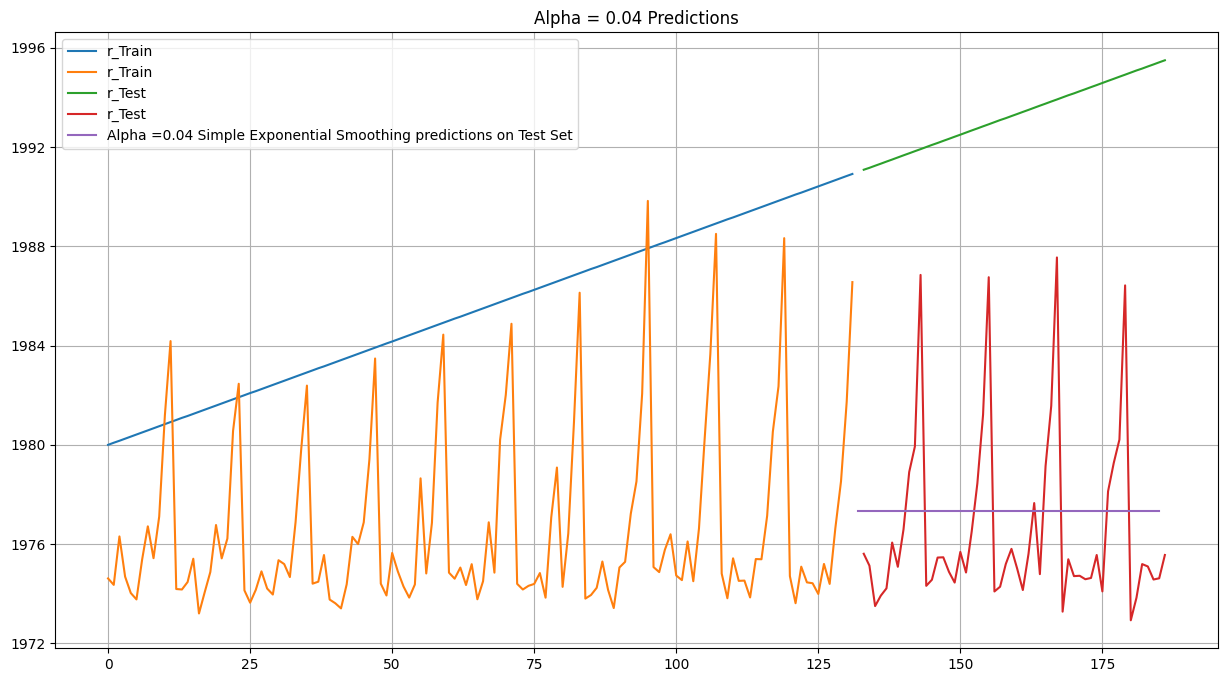

In [23]:
plt.plot(r_train, label='r_Train')
plt.plot(r_test, label='r_Test')

plt.plot(SES_predict, label='Alpha =0.04 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.04 Predictions');

In [24]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [25]:
SES_df = pd.DataFrame(SES_predict)
SES_df.head()

,0
132,2676.676366
133,2676.676366
134,2676.676366
135,2676.676366
136,2676.676366


In [151]:
from sklearn import metrics
rmse_model5_test_1 = metrics.mean_squared_error(r_test['Sparkling'],SES_df[0],squared=False)
print("For Alpha =0.04 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.04 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1312.729


Double Exponential Smoothing

In [28]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(r_train['Sparkling'],initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999998, 'initial_trend': 74.87272727272733, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [29]:
DES_predict =  model_DES.forecast(len(r_test))
DES_predict.head()

132    5401.733026
133    5476.005230
134    5550.277433
135    5624.549637
136    5698.821840
dtype: float64

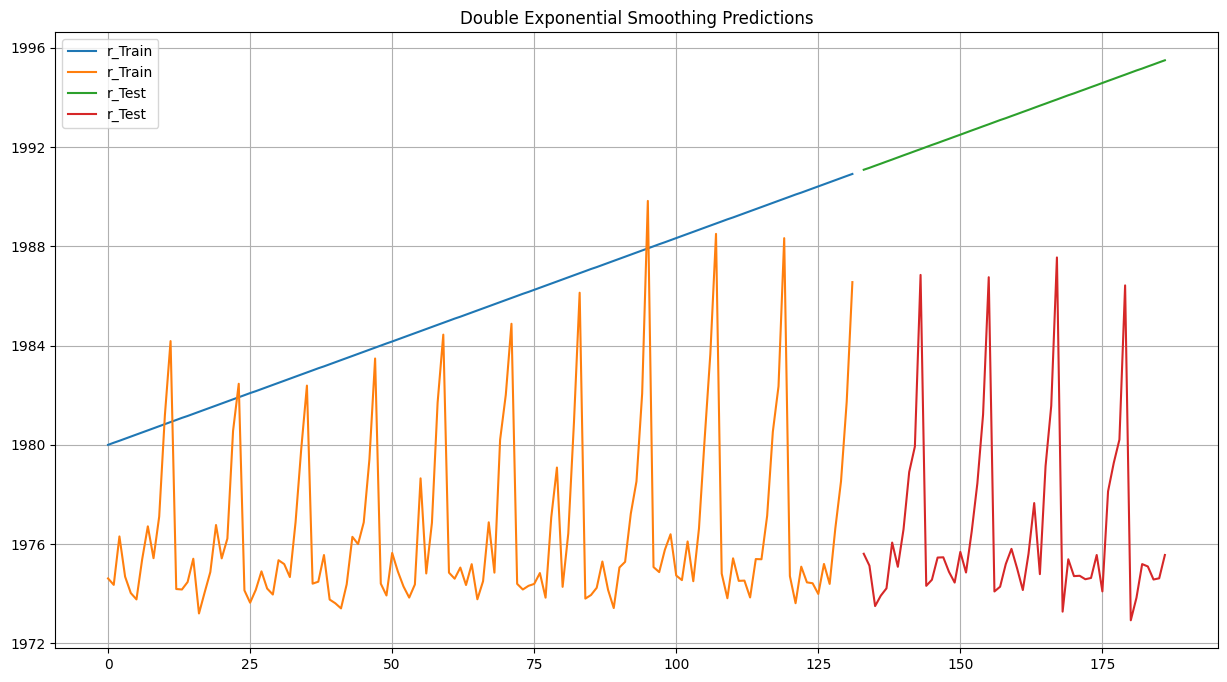

In [30]:
plt.plot(r_train, label='r_Train')
plt.plot(r_test, label='r_Test')



plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions');

In [33]:
DES_df = pd.DataFrame(DES_predict)
DES_df.head(5)

,0
132,5401.733026
133,5476.005230
134,5550.277433
135,5624.549637
136,5698.821840


In [32]:
print('DES RMSE:',mean_squared_error(r_test['Sparkling'], DES_df[0],squared=False))

DES RMSE: 5249.117438874882


Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [34]:
TES_train = r_train.copy()
TES_test = r_test.copy()

In [40]:

TES_train.index = pd.DatetimeIndex(TES_train.index.to_timestamp()).to_period('M')
model_TES = ExponentialSmoothing(TES_train['Sparkling'], trend='additive', seasonal='multiplicative', freq='M')

In [41]:
model_TES_autofit = model_TES.fit()

In [42]:
model_TES_autofit.params

{'smoothing_level': 0.11119949831569428,
 'smoothing_trend': 0.049430920023313805,
 'smoothing_seasonal': 0.3620525701498937,
 'damping_trend': nan,
 'initial_level': 2356.5264391986907,
 'initial_trend': -9.443690175376352,
 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
        0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
        1.86941738, 2.3734461 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [43]:
TES_predict =  model_TES_autofit.forecast(len(TES_test))
TES_predict.head()

1970-02    1598.701025
1970-03    2108.556290
1970-04    1888.934478
1970-05    1516.830517
1970-06    1500.974814
Freq: M, dtype: float64

In [45]:
print('TES RMSE:',mean_squared_error(TES_test['Sparkling'],TES_predict.values,squared=False))

TES RMSE: 574.1372924200447


Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

In [47]:
# Initializing the Double Exponential Smoothing Model

model_TES_am = ExponentialSmoothing(TES_train['Sparkling'],trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11119949831569428, 'smoothing_trend': 0.049430920023313805, 'smoothing_seasonal': 0.3620525701498937, 'damping_trend': nan, 'initial_level': 2356.5264391986907, 'initial_trend': -9.443690175376352, 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
       0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
       1.86941738, 2.3734461 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [48]:
TES_predict_am =  model_TES_am.forecast(len(TES_test))
TES_predict_am.head()

1970-02    1598.701025
1970-03    2108.556290
1970-04    1888.934478
1970-05    1516.830517
1970-06    1500.974814
Freq: M, dtype: float64

In [49]:
print('TES_am RMSE:',mean_squared_error(TES_test['Sparkling'],TES_predict_am.values,squared=False))

TES_am RMSE: 574.1372924200447


LINEAR REGRESSION

In [141]:
LinearRegression_train= r_train.copy()
LinearRegression_test= r_test.copy()

In [88]:
from sklearn.linear_model import LinearRegression

In [142]:
lr = LinearRegression()

In [147]:
LinearRegression_test[['YearMonth']]= LinearRegression_test[['YearMonth']].astype(int)

In [145]:
lr.fit(LinearRegression_train[['YearMonth']],LinearRegression_train['Sparkling'])

LinearRegression()

In [92]:
lr.fit(LinearRegression_train[['YearMonth']],LinearRegression_train['Sparkling'].values)

ValueError: ignored

In [93]:
df_r = df_r.set_index('YearMonth')

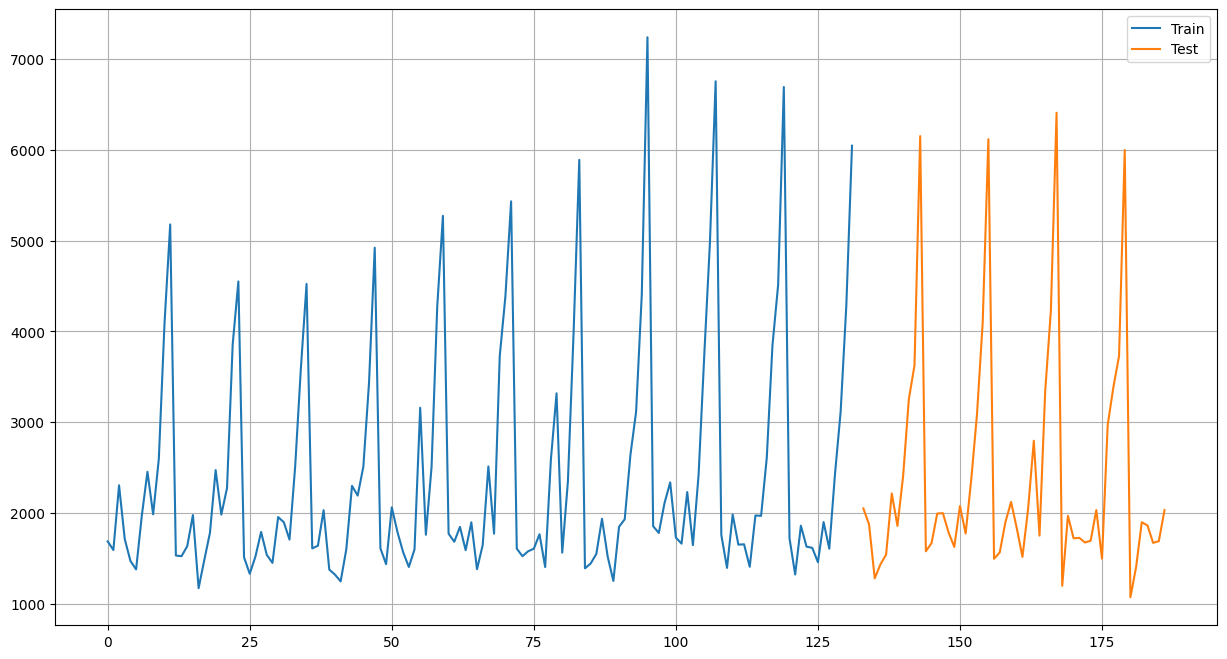

In [148]:
test_predictions_model = lr.predict(LinearRegression_test[['YearMonth']])

plt.plot(r_train['Sparkling'], label='Train')
plt.plot(r_test['Sparkling'], label='Test')

plt.legend(loc='best')
plt.grid();

In [149]:
from sklearn import metrics

In [150]:
rmse_model1_test = metrics.mean_squared_error(LinearRegression_test[['YearMonth']],test_predictions_model,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 736093919117170560.00


MOVING AVERAGE

In [96]:
MovingAverage = df_r.copy()
MovingAverage.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [98]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,YearMonth,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
0,1980-01,1686,NaN,NaN,NaN,NaN
1,1980-02,1591,1638.5,NaN,NaN,NaN
2,1980-03,2304,1947.5,NaN,NaN,NaN
3,1980-04,1712,2008.0,1823.25,NaN,NaN
4,1980-05,1471,1591.5,1769.50,NaN,NaN


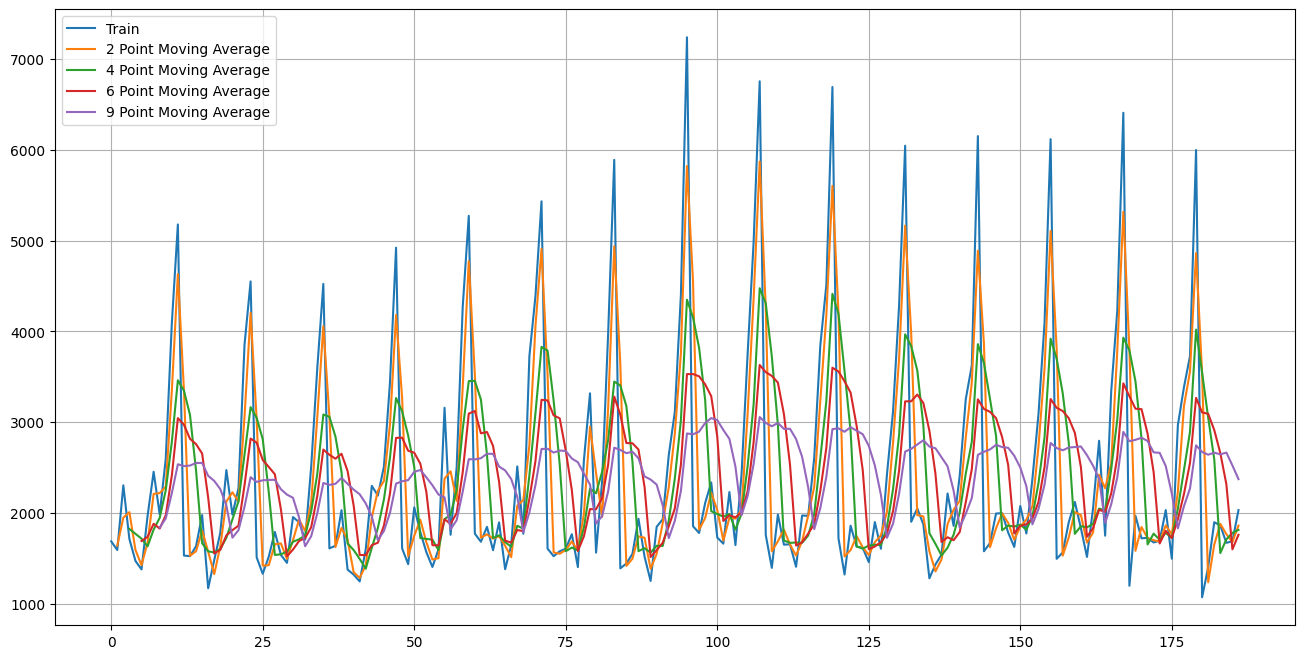

In [99]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [100]:
trailing_MovingAverage_train=MovingAverage[df_r['YearMonth']<'1991']
trailing_MovingAverage_test=MovingAverage[df_r['YearMonth']>'1991']

In [101]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(r_test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(r_test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(r_test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(r_test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data, RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data, RMSE is 1346.278 


NAIVE MODEL

In [102]:
NaiveModel_train = r_train.copy()
NaiveModel_test = r_test.copy()

In [103]:
NaiveModel_test['naive'] = np.asarray(r_train['Sparkling'])[len(np.asarray(r_train['Sparkling']))-1]
NaiveModel_test['naive'].head()

132    6047
133    6047
134    6047
135    6047
136    6047
Name: naive, dtype: int64

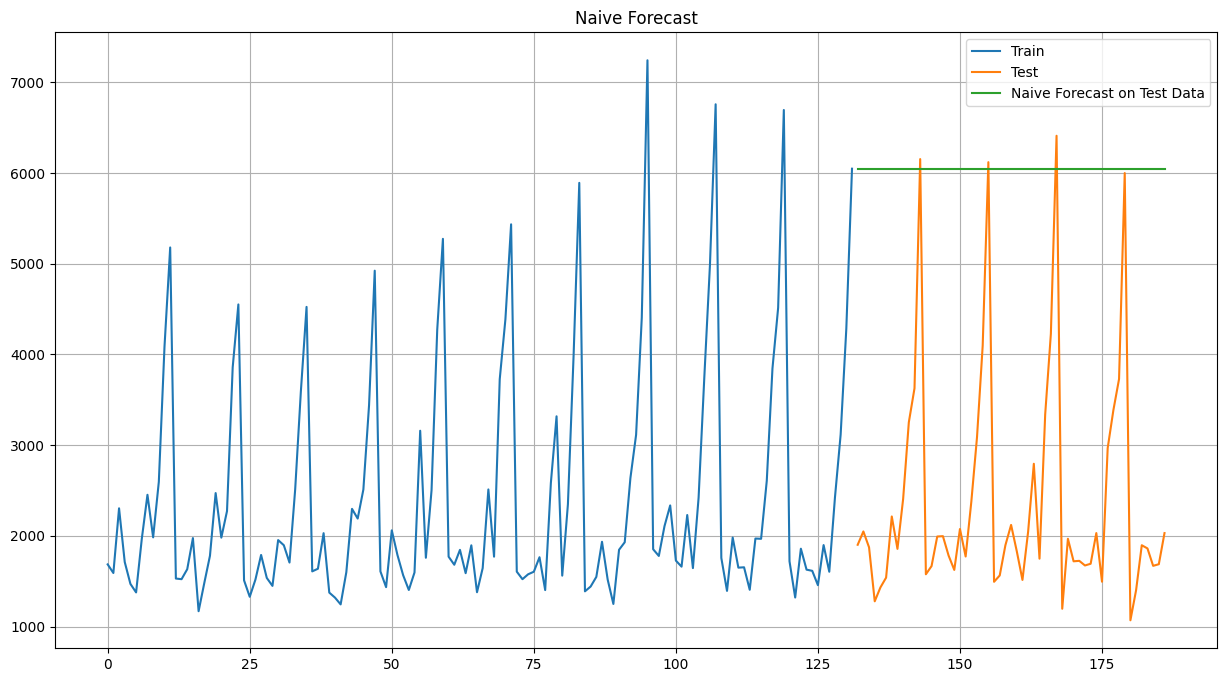

In [104]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(r_test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [105]:
rmse_model2_test = metrics.mean_squared_error(r_test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


SIMPLE AVERAGE

In [106]:
SimpleAverage_train = r_train.copy()
SimpleAverage_test = r_test.copy()

In [107]:
SimpleAverage_test['mean_forecast'] = r_train['Sparkling'].mean()
SimpleAverage_test.head()

,YearMonth,Sparkling,mean_forecast
132,1991-01,1902,2403.780303
133,1991-02,2049,2403.780303
134,1991-03,1874,2403.780303
135,1991-04,1279,2403.780303
136,1991-05,1432,2403.780303


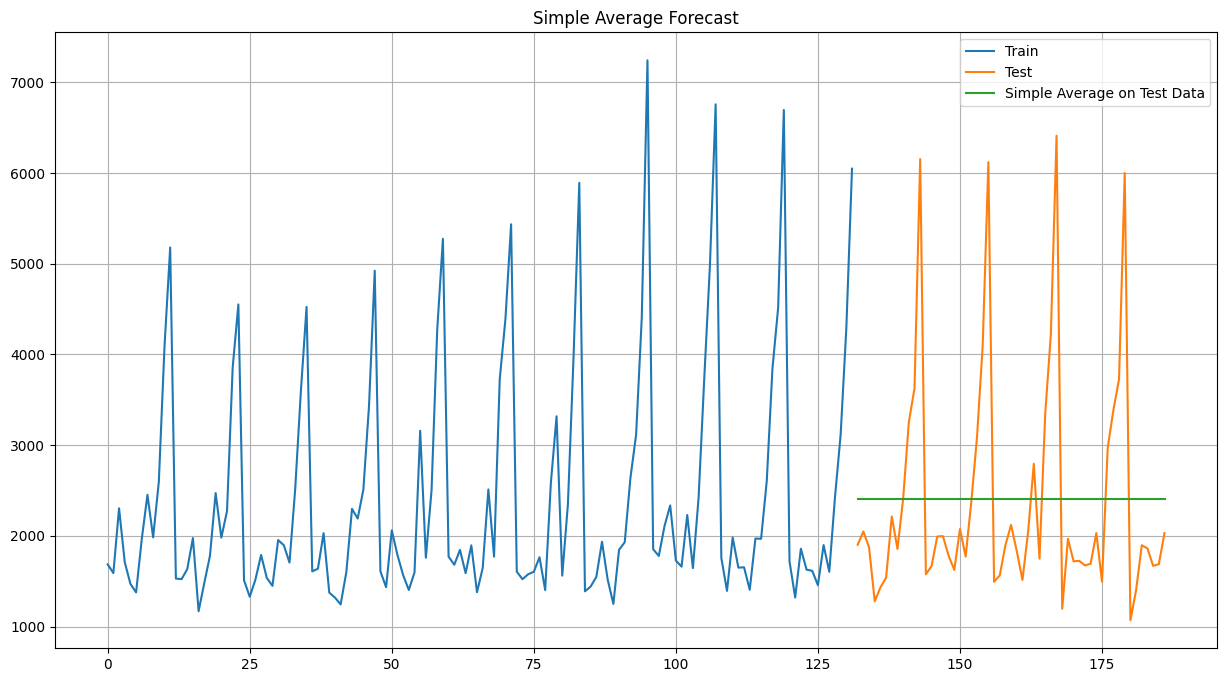

In [108]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [109]:
rmse_model3_test = metrics.mean_squared_error(r_test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


# Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

In [110]:
from statsmodels.tsa.stattools import adfuller

In [111]:
rose = df_r['Sparkling']

Text(0, 0.5, 'Sparkling')

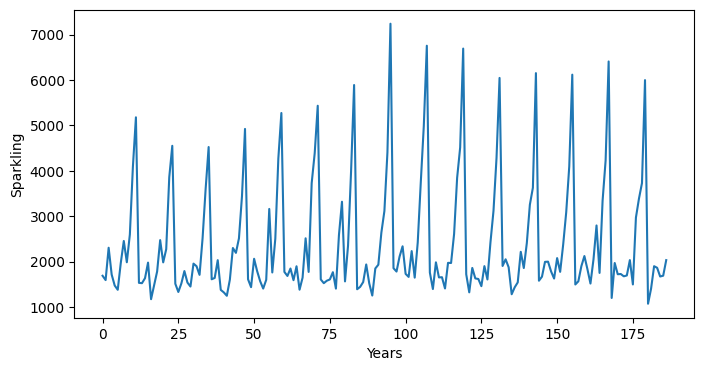

In [112]:
plt.figure(figsize=(8, 4))
plt.plot(rose)
plt.xlabel('Years')
plt.ylabel('Sparkling')

In [113]:
dftest = adfuller(rose)#python implementation of dicky fuller test
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


Text(0, 0.5, 'Sparkling')

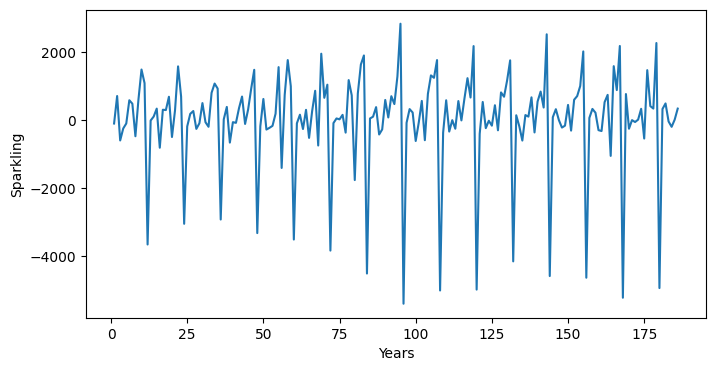

In [114]:
plt.figure(figsize=(8, 4))
plt.plot(rose.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Sparkling')

Text(0, 0.5, 'log (Sparkling)')

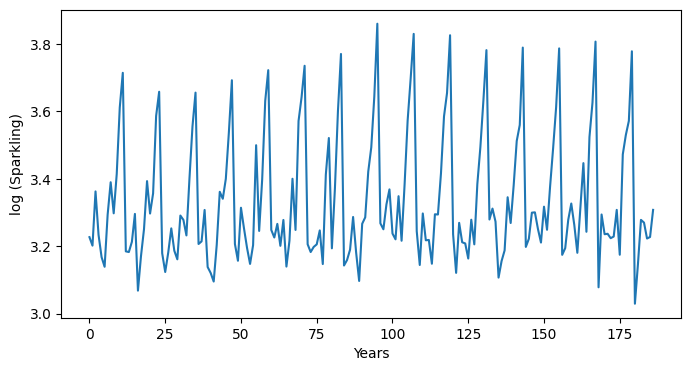

In [115]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(rose))
plt.xlabel('Years')
plt.ylabel('log (Sparkling)')

Text(0, 0.5, 'Differenced Log (Sparkling)')

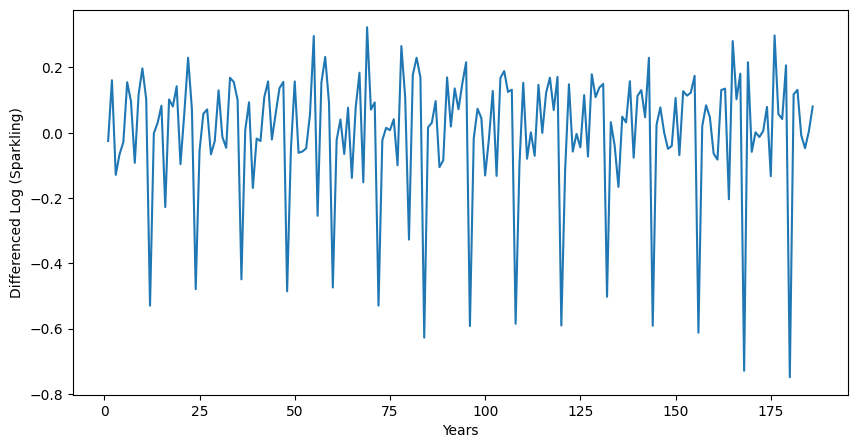

In [116]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(rose).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Sparkling)')

# Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [11]:
p= range(1,4)
q = range(1, 4)

In [12]:
d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [13]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [14]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [15]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [16]:
seasonal_pdq

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [17]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [18]:
from statsmodels.tsa.arima.model import ARIMA
train_sales_ts_log = np.log10(r_train['Sparkling'])

for param in pdq:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:-96.5537513904309
ARIMA(1, 0, 2) - AIC:-95.99972488280413
ARIMA(1, 0, 3) - AIC:-102.0962242622738
ARIMA(1, 1, 1) - AIC:-87.99737290461515
ARIMA(1, 1, 2) - AIC:-91.00637908547388
ARIMA(1, 1, 3) - AIC:-90.44561923179305
ARIMA(2, 0, 1) - AIC:-106.95537062528209
ARIMA(2, 0, 2) - AIC:-95.53751052388324


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 3) - AIC:-130.74910874389502
ARIMA(2, 1, 1) - AIC:-91.85378600996674


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2) - AIC:-98.83035213681447
ARIMA(2, 1, 3) - AIC:-95.48274292709146
ARIMA(3, 0, 1) - AIC:-93.6060437628968


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 2) - AIC:-103.19439632475334


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 3) - AIC:-136.429366420032
ARIMA(3, 1, 1) - AIC:-66.69144093745732


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:-100.10530841894547
ARIMA(3, 1, 3) - AIC:-116.36180331720595


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
14,"(3, 0, 3)",-136.429366
8,"(2, 0, 3)",-130.749109
17,"(3, 1, 3)",-116.361803
6,"(2, 0, 1)",-106.955371
13,"(3, 0, 2)",-103.194396


In [20]:
best_model = ARIMA(train_sales_ts_log,order = (3,0,3))
best_results = best_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 0, 3)   Log Likelihood                  76.215
Date:                Sun, 03 Sep 2023   AIC                           -136.429
Time:                        14:58:52   BIC                           -113.367
Sample:                             0   HQIC                          -127.058
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3341      0.010    331.860      0.000       3.314       3.354
ar.L1          0.7373      0.383      1.925      0.054      -0.013       1.488
ar.L2          0.7244      0.660      1.097      0.2

In [22]:
pred99 = best_results.get_forecast(steps=len(r_test), alpha=0.1)#forecasting values

In [23]:
pred_dynamic = best_results.get_prediction(dynamic=True, full_results=True)

In [24]:
rose_forecasted = pred_dynamic.predicted_mean
testCopy1 = r_test.copy()
testCopy1['Sparkling_forecasted'] = np.power(10, pred99.predicted_mean)

In [25]:
mse = ((testCopy1['Sparkling'] - testCopy1['Sparkling_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 948.84


In [26]:
testCopy1

,YearMonth,Sparkling,Sparkling_forecasted
133,1991-02-01,2049,2006.813444
134,1991-03-01,1874,1510.761003
135,1991-04-01,1279,1216.682692
136,1991-05-01,1432,1174.073178
137,1991-06-01,1540,1295.418538
138,1991-07-01,2214,1682.237448
139,1991-08-01,1857,2269.031902
140,1991-09-01,2408,3101.075501
141,1991-10-01,3252,3742.731752
142,1991-11-01,3627,4007.434764


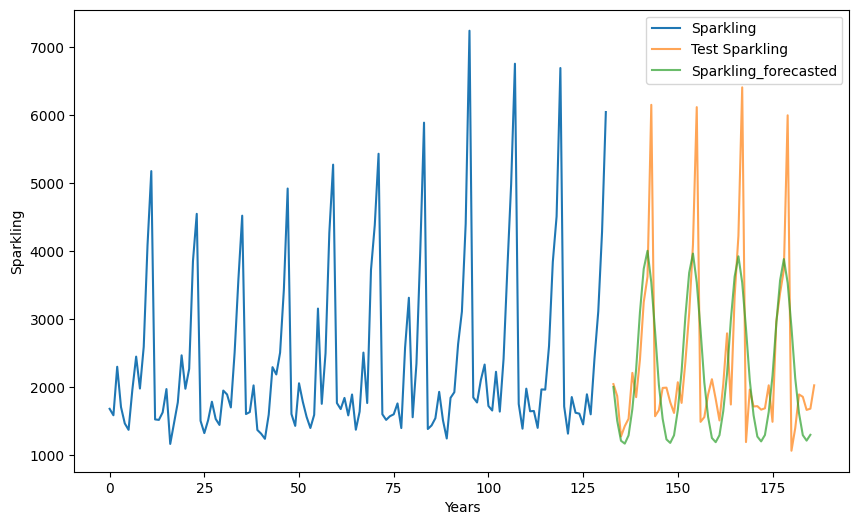

In [27]:
axis = r_train['Sparkling'].plot(label='Sparkling', figsize=(10, 6))
testCopy1['Sparkling'].plot(ax=axis, label='Test Sparkling', alpha=0.7)
testCopy1['Sparkling_forecasted'].plot(ax=axis, label='Sparkling_forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()
plt.close()

# Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [5]:
differenced_series = df_r['Sparkling'].diff().dropna()

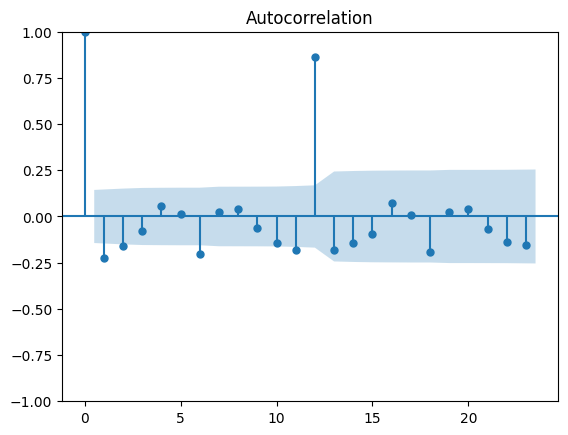

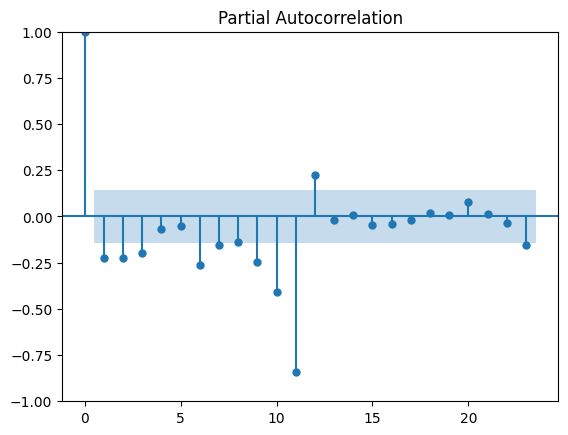

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(differenced_series)
plt.show()

plot_pacf(differenced_series)
plt.show()

In [7]:
p, d, q = 3,0,3  # Replace with your chosen values
P, D, Q, s = 3,0,3, 12  # Replace with your chosen values

sarima_model = sm.tsa.SARIMAX(df_r['Sparkling'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()

In [8]:
forecast_steps = 12
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Extract forecast values and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

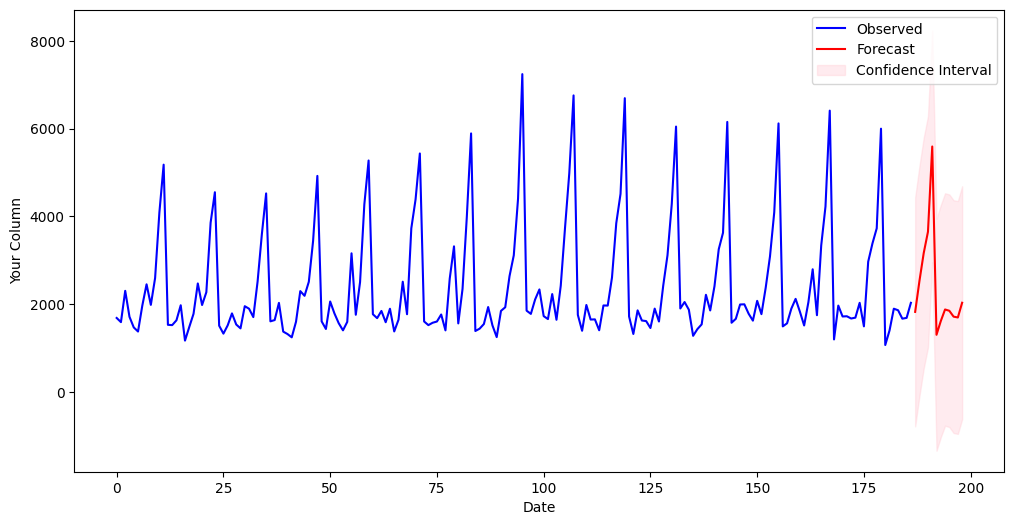

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df_r.index, df_r['Sparkling'], label='Observed', color='blue')
plt.plot(forecast_mean.index, forecast_mean.values, color='red', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Your Column')
plt.legend()
plt.show()

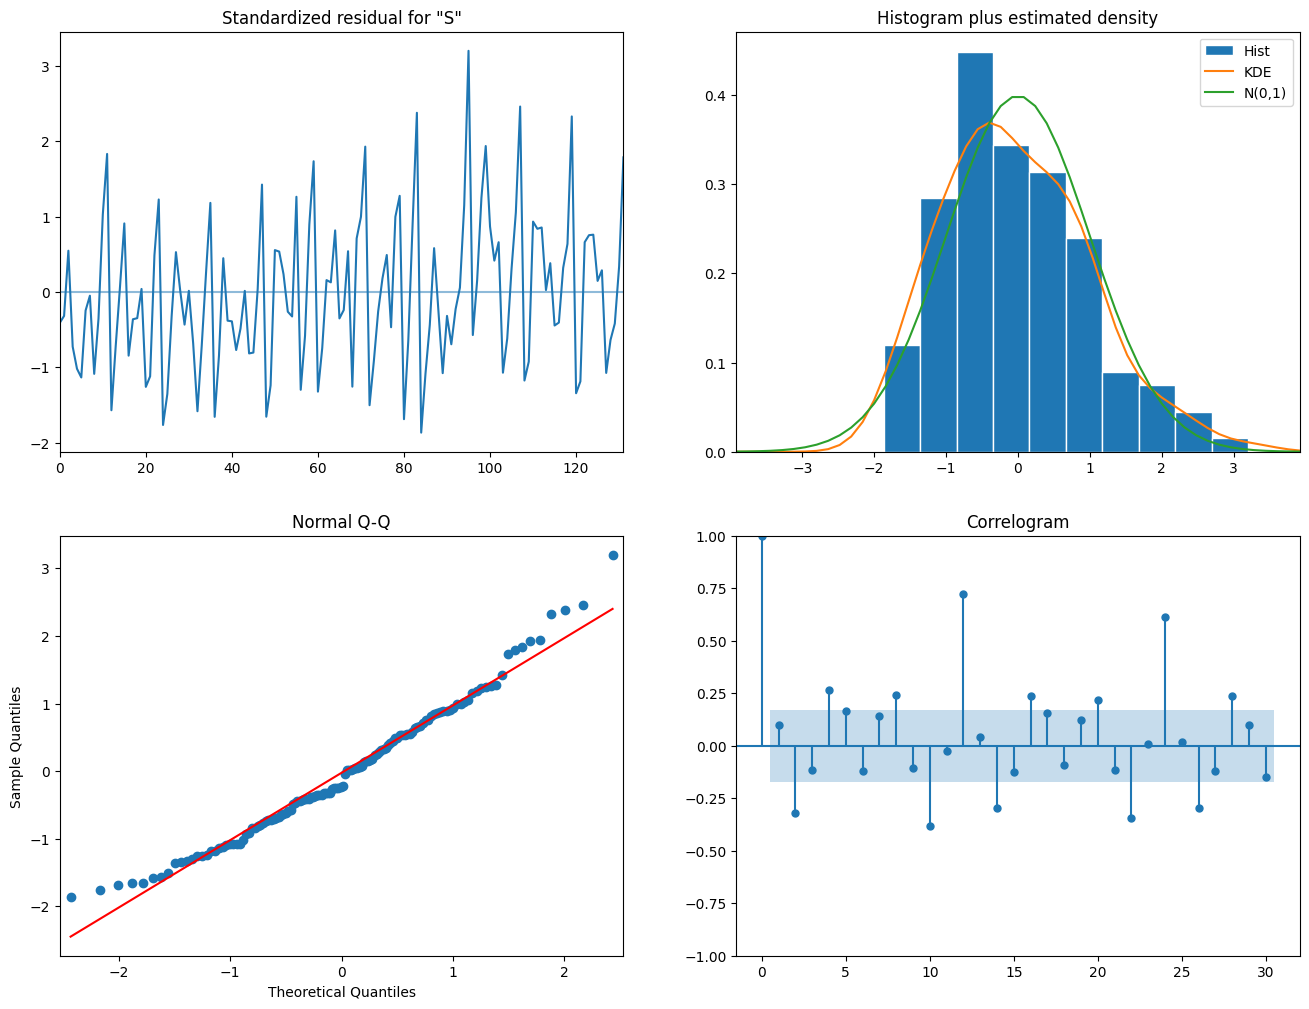

In [28]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()